# 한국어 전처리 패키지 (Text preprocessing Tools for Korean Text)

1.PyKoSpacing

전희원님이 개발한 PyKoSpacing은 한국어 띄어쓰기 패키지로 띄어쓰기가 되어있지 않은 문장을 띄어쓰기를 한 문장으로 변환해주는 패키지입니다. PyKoSpacing은 대용량 코퍼스를 학습하여 만들어진 띄어쓰기 딥 러닝 모델로 준수한 성능을 가지고 있습니다.

In [ ]:
!pip install git+https://github.com/haven-jeon/PyKoSpacing.git

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/haven-jeon/PyKoSpacing.git to /tmp/pip-req-build-khj89d5q
  Running command git clone -q https://github.com/haven-jeon/PyKoSpacing.git /tmp/pip-req-build-khj89d5q
     |████████████████████████████████| 671.4 MB 1.6 kB/s 
     |████████████████████████████████| 463 kB 6.9 MB/s 
     |████████████████████████████████| 1.3 MB 65.6 MB/s 
  Created wheel for pykospacing: filename=pykospacing-0.5-py3-none-any.whl size=2268638 sha256=4f1ca3c530e8cc9952956e6261a540610d554082b8a7a66481cb9ce983cc5322
  Stored in directory: /tmp/pip-ephem-wheel-cache-isiu6mto/wheels/9b/93/81/a2a7dc8c66ede5bf30634d20635f32b95eac7ca2ea8844058b
Successfully built pykospacing
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.8.0
    Uninstalling tensorflow-estimator-2.8.0:
      Successfully uninstalled tensorflow-estimator-2.8.0
  Attempti

In [ ]:
sent = '김철수는 극중 두 인격의 사나이 이광수 역을 맡았다. 철수는 한국 유일의 태권도 전승자를 가리는 결전의 날을 앞두고 10년간 함께 훈련한 사형인 유연재(김광수 분)를 찾으러 속세로 내려온 인물이다.'

In [ ]:
new_sent = sent.replace(" ", '') # 띄어쓰기가 없는 문장 임의로 만들기
print(new_sent)

김철수는극중두인격의사나이이광수역을맡았다.철수는한국유일의태권도전승자를가리는결전의날을앞두고10년간함께훈련한사형인유연재(김광수분)를찾으러속세로내려온인물이다.


In [ ]:
#원 문장과 비교

from pykospacing import spacing

kospacing_sent = spacing(new_sent)
print(sent)
print(kospacing_sent)

ImportError: ignored

2. Py-Hanspell
- Py-Hanspell은 네이버 한글 맞춤법 검사기를 바탕으로 만들어진 패키지입니다.


In [ ]:
!pip install git+https://github.com/ssut/py-hanspell.git

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/ssut/py-hanspell.git to /tmp/pip-req-build-mmzln4mu
  Running command git clone -q https://github.com/ssut/py-hanspell.git /tmp/pip-req-build-mmzln4mu
  Created wheel for py-hanspell: filename=py_hanspell-1.1-py3-none-any.whl size=4868 sha256=e2413eae8a42ce2c84a96c574e790202be61954c430f076372fa84b6eacdc327
  Stored in directory: /tmp/pip-ephem-wheel-cache-8j9jzl7b/wheels/ab/f5/7b/d4124bb329c905301baed80e2ae45aa14e824f62ebc3ec2cc4
Successfully built py-hanspell


In [ ]:
from hanspell import spell_checker

sent = "맞춤법 틀리면 외 않되? 쓰고싶은대로쓰면돼지 "
spelled_sent = spell_checker.check(sent)

hanspell_sent = spelled_sent.checked
print(hanspell_sent)

맞춤법 틀리면 왜 안돼? 쓰고 싶은 대로 쓰면 되지


In [ ]:
spelled_sent = spell_checker.check(new_sent)

hanspell_sent = spelled_sent.checked
print(hanspell_sent)
# print(kospacing_sent) # 앞서 사용한 kospacing 패키지에서 얻은 결과

김철수는 극 중 두 인격의 사나이 이광수 역을 맡았다. 철수는 한국 유일의 태권도 전승자를 가리는 결전의 날을 앞두고 10년간 함께 훈련한 사형인 유연제(김광수 분)를 찾으러 속세로 내려온 인물이다.


이 패키지는 띄어쓰기 또한 보정합니다. PyKoSpacing에 사용한 예제를 그대로 사용해봅시다.

In [ ]:
spelled_sent = spell_checker.check(new_sent)

hanspell_sent = spelled_sent.checked
print(hanspell_sent)
# print(kospacing_sent) # 앞서 사용한 kospacing 패키지에서 얻은 결과

김철수는 극 중 두 인격의 사나이 이광수 역을 맡았다. 철수는 한국 유일의 태권도 전승자를 가리는 결전의 날을 앞두고 10년간 함께 훈련한 사형인 유연제(김광수 분)를 찾으러 속세로 내려온 인물이다.


# SOYNLP를 이용한 단어 토큰화

soynlp는 품사 태깅, 단어 토큰화 등을 지원하는 단어 토크나이저입니다. 비지도 학습으로 단어 토큰화를 한다는 특징을 갖고 있으며, 데이터에 자주 등장하는 단어들을 단어로 분석합니다. soynlp 단어 토크나이저는 내부적으로 단어 점수 표로 동작합니다. 이 점수는 응집 확률(cohesion probability)과 브랜칭 엔트로피(branching entropy)를 활용합니다.

In [ ]:
!pip install soynlp
!pip install konlpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 19.4 MB 502 kB/s 
     |████████████████████████████████| 453 kB 19.8 MB/s 


1. 신조어 문제

soynlp를 소개하기 전에 기존의 형태소 분석기가 가진 문제는 무엇이었는지, SOYNLP가 어떤 점에서 유용한지 정리해봅시다. 기존의 형태소 분석기는 신조어나 형태소 분석기에 등록되지 않은 단어 같은 경우에는 제대로 구분하지 못하는 단점이 있었습니다.

In [ ]:
from konlpy.tag import Okt
tokenizer = Okt()
print(tokenizer.morphs('에이비식스 이대휘 1월 최애돌 기부 요정'))

['에이', '비식스', '이대', '휘', '1월', '최애', '돌', '기부', '요정']


에이비식스는 아이돌의 이름이고, 이대휘는 에이비식스의 멤버이며, 최애돌은 최고로 애정하는 캐릭터라는 뜻이지만 위의 형태소 분석 결과에서는 전부 분리된 결과를 보여줍니다.

그렇다면 텍스트 데이터에서 특정 문자 시퀀스가 함께 자주 등장하는 빈도가 높고, 앞 뒤로 조사 또는 완전히 다른 단어가 등장하는 것을 고려해서 해당 문자 시퀀스를 형태소라고 판단하는 단어 토크나이저라면 어떨까요?

예를 들어 에이비식스라는 문자열이 자주 연결되어 등장한다면 한 단어라고 판단하고, 또한 에이비식스라는 단어 앞, 뒤에 '최고', '가수', '실력'과 같은 독립된 다른 단어들이 계속해서 등장한다면 에이비식스를 한 단어로 파악하는 식이지요. 그리고 이런 아이디어를 가진 단어 토크나이저가 soynlp입니다.


2. 학습하기

soynlp는 기본적으로 학습에 기반한 토크나이저이므로 학습에 필요한 한국어 문서를 다운로드합니다.

In [ ]:
import urllib.request
from soynlp import DoublespaceLineCorpus
from soynlp.word import WordExtractor

In [ ]:
urllib.request.urlretrieve("https://raw.githubusercontent.com/lovit/soynlp/master/tutorials/2016-10-20.txt", filename="2016-10-20.txt")

('2016-10-20.txt', <http.client.HTTPMessage at 0x7f08c3cd5190>)

In [ ]:
# 훈련 데이터를 다수의 문서로 분리
corpus = DoublespaceLineCorpus("2016-10-20.txt")
len(corpus)

30091

In [ ]:
i = 0
for document in corpus:
  if len(document) > 0:
    print(document)
    i = i+1
  if i == 3:
    break

19  1990  52 1 22
오패산터널 총격전 용의자 검거 서울 연합뉴스 경찰 관계자들이 19일 오후 서울 강북구 오패산 터널 인근에서 사제 총기를 발사해 경찰을 살해한 용의자 성모씨를 검거하고 있다 성씨는 검거 당시 서바이벌 게임에서 쓰는 방탄조끼에 헬멧까지 착용한 상태였다 독자제공 영상 캡처 연합뉴스  서울 연합뉴스 김은경 기자 사제 총기로 경찰을 살해한 범인 성모 46 씨는 주도면밀했다  경찰에 따르면 성씨는 19일 오후 강북경찰서 인근 부동산 업소 밖에서 부동산업자 이모 67 씨가 나오기를 기다렸다 이씨와는 평소에도 말다툼을 자주 한 것으로 알려졌다  이씨가 나와 걷기 시작하자 성씨는 따라가면서 미리 준비해온 사제 총기를 이씨에게 발사했다 총알이 빗나가면서 이씨는 도망갔다 그 빗나간 총알은 지나가던 행인 71 씨의 배를 스쳤다  성씨는 강북서 인근 치킨집까지 이씨 뒤를 쫓으며 실랑이하다 쓰러뜨린 후 총기와 함께 가져온 망치로 이씨 머리를 때렸다  이 과정에서 오후 6시 20분께 강북구 번동 길 위에서 사람들이 싸우고 있다 총소리가 났다 는 등의 신고가 여러건 들어왔다  5분 후에 성씨의 전자발찌가 훼손됐다는 신고가 보호관찰소 시스템을 통해 들어왔다 성범죄자로 전자발찌를 차고 있던 성씨는 부엌칼로 직접 자신의 발찌를 끊었다  용의자 소지 사제총기 2정 서울 연합뉴스 임헌정 기자 서울 시내에서 폭행 용의자가 현장 조사를 벌이던 경찰관에게 사제총기를 발사해 경찰관이 숨졌다 19일 오후 6시28분 강북구 번동에서 둔기로 맞았다 는 폭행 피해 신고가 접수돼 현장에서 조사하던 강북경찰서 번동파출소 소속 김모 54 경위가 폭행 용의자 성모 45 씨가 쏜 사제총기에 맞고 쓰러진 뒤 병원에 옮겨졌으나 숨졌다 사진은 용의자가 소지한 사제총기  신고를 받고 번동파출소에서 김창호 54 경위 등 경찰들이 오후 6시 29분께 현장으로 출동했다 성씨는 그사이 부동산 앞에 놓아뒀던 가방을 챙겨 오패산 쪽으로 도망간 후였다  김 경위는 오패산 터널 입구 오른쪽의 급경사에서 성씨에

In [ ]:
word_extractor = WordExtractor()
word_extractor.train(corpus)
word_score_table = word_extractor.extract()

training was done. used memory 1.782 Gb
all cohesion probabilities was computed. # words = 223348
all branching entropies was computed # words = 361598
all accessor variety was computed # words = 361598


정상 출력되는 것을 확인하였습니다. soynlp는 학습 기반의 단어 토크나이저이므로 기존의 KoNLPy에서 제공하는 형태소 분석기들과는 달리 학습 과정을 거쳐야 합니다. 이는 전체 코퍼스로부터 응집 확률과 브랜칭 엔트로피 단어 점수표를 만드는 과정입니다. WordExtractor.extract()를 통해서 전체 코퍼스에 대해 단어 점수표를 계산합니다.

In [ ]:
word_extractor = WordExtractor()
word_extractor.train(corpus)
word_score_table = word_extractor.extract()

training was done. used memory 1.843 Gb
all cohesion probabilities was computed. # words = 223348
all branching entropies was computed # words = 361598
all accessor variety was computed # words = 361598


# SOYNLP의 응집 확률(cohesion probability)

응집 확률은 내부 문자열(substring)이 얼마나 응집하여 자주 등장하는지를 판단하는 척도입니다. 응집 확률은 문자열을 문자 단위로 분리하여 내부 문자열을 만드는 과정에서 왼쪽부터 순서대로 문자를 추가하면서 각 문자열이 주어졌을 때 그 다음 문자가 나올 확률을 계산하여 누적곱을 한 값입니다. 이 값이 높을수록 전체 코퍼스에서 이 문자열 시퀀스는 하나의 단어로 등장할 가능성이 높습니다. 수식은 아래와 같습니다.

<figure>
<img src = 'https://wikidocs.net/images/page/92961/%EC%88%98%EC%8B%9D.png'>
<figure>

'반포한강공원에'라는 7의 길이를 가진 문자 시퀀스에 대해서 각 내부 문자열의 스코어를 구하는 과정은 아래와 같습니다.

<figure>
<img src = 'https://wikidocs.net/images/page/92961/%EC%88%98%EC%8B%9D2.png'>
<figure>

실습을 통해 직접 응집 확률을 계산해보겠습니다

In [ ]:
word_score_table["반포한"].cohesion_forward

0.08838002913645132

그렇다면 '반포한강'의 응집 확률은 '반포한'의 응집 확률보다 높을까요?

In [ ]:
word_score_table["반포한강"].cohesion_forward

0.19841268168224552

'반포한강'은 '반포한'보다 응집 확률이 높습니다. 그렇다면 '반포한강공'은 어떨까요?

In [ ]:
word_score_table["반포한강공"].cohesion_forward

0.2972877884078849

역시나 '반포한강'보다 응집 확률이 높습니다. '반포한강공원'은 어떨까요?

In [ ]:
word_score_table["반포한강공원"].cohesion_forward

0.37891487632839754

'반포한강공'보다 응집 확률이 높습니다. 여기다가 조사 '에'를 붙인 '반포한강공원에'는 어떨까요?

In [ ]:
word_score_table["반포한강공원에"].cohesion_forward

0.33492963377557666

오히려 '반포한강공원'보다 응집도가 낮아집니다. 결국 결합도는 '반포한강공원'일 때가 가장 높았습니다. 응집도를 통해 판단하기에 하나의 단어로 판단하기에 가장 적합한 문자열은 '반포한강공원'이라고 볼 수 있겠네요.

# 언어 모델(Language Model)

- 언어 모델(Language Model)이란 단어 시퀀스(문장)에 확률을 할당하는 모델을 말함. 어떤 문장들이 있을 때, 적절한지 사람처럼 판단할 수 있다면, 기계가 자연어 처리를 정말 잘한다고 볼 수 있음 -> 언어 모델이 하는 일

- 크게는 통계를 이용한 방법과 인공 신경망을 이용한 방법으로 구분이 가능. 최근 핫한 자연어 처리 신기술인  GPT 나 Bert, Transformer 또한 인공 신경망 모델 기반


## 주어진 이전 단어들로부터 다음 단어 예측하기

- 확률을 할당하기 위해서 가장 보편적으로 사용되는 방법은 언어 모델이 이전 단어들이 주어졌을 때 다음 단어를 예측하도록 하는 것이다.

- 자연어 처리로 유명한 스탠포드 대학교에서는 언어 모델을 문법(Grammar)이라고 비유한다.


### 단어 시퀀스의 확률
- 하나의 단어를 w, 단어 시퀀스를 대문자 W라고 한다면, n개의 단어가 등장하는 단어 시퀀스 W의 확률은 다음과 같다. P의 확률

$~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~P(W) = P(w_1, w_2, w_3, \cdots, w_n)$

- 언어 모델이 단어들의 조합이 얼마나 적절한지, 또는 해당 문장이 얼마나 적합한지를 알려주는 일을 하기 때문.

-  문장의 확률을 예측하는 일이 왜 필요한가?


언어 모델은 문장의 확률을 예측하는 일이다. 그럼 문장의 확률을 예측하는 것이 왜 필요한지 예를 들어보도록 한다. 여기서 대문자 P는 확률을 의미한다.

 - a. 기계 번역(Machine Translation)
  - P(나는 버스를 탔다) > P(나는 버스를 태운다)

   : 언어 모델은 두 문장을 비교하여 좌측의 문장의 확률이 더 높다고 판단한다.

 - b. 오타 교정(Spell Correction)

    - 선생님이 교실로 부리나케

    - P(달려갔다) > P(잘려갔다)

    - : 언어 모델은 두 문장을 비교하여 좌측의 문장이 확률이 더 높다고 판단한다.

 - c. 음성 인식(Speech Recognition)

    - P(나는 메롱을 먹는다) < P(나는 메론을 먹는다)

    - : 언어 모델은 두 문장을 비교하여 우측의 문장의 확률이 더 높다고 판단한다.

 - 언어 모델은 위와 같이 보다 **적절한 문장을 선택하는 일에 확률**을 사용한다.



#### 문장의 확률 예측


- 하나의 단어(word)를 w라고 하자. 단어의 시퀀스인 전체 문장(sentence)을 대문자 W라고 하자. n개의 w로 구성된 문장 W의 확률은 다음과 같이 표현

 - ${P(W) = P(w_{1},w_{2},w_{3},w_{4},w_{5}, {\dots}, w_{n}) = {\Pi_{i=1}^{n}} P(w_n) }$


## 통계적 언어 모델(Statistical Language Model, SLM)
- 언어 모델의 전통적인 접근 방법인 통계적 언어 모델.

### 연쇄 법칙(Chain rule)

$~~~~~~P(x_1,x_2,x_3,\cdots, x_n) = P(x_1)P(x_2|x_1)P(x_3|x_1,x_2) \dots P(x_n|x_1,\dots,x_{n-1})$

이 조건부 확률을 이용하여 '안녕하세요 저는 딥러능을 공부하고 있습니다.'라는 문장의 확률을 구해보자. 

$P(안녕하세요~저는~딥러닝을~공부하고~있습니다) = P(안녕하세요)\times P(저는|안녕하세요)\times P(딥러닝을|안녕하세요~저는) \times \dots P(있습니다.|안녕하세요~저는~딥러닝을 공부하고)$

해당 문장의 확률은
'안녕하세요'가 나올 확률 X
'안녕하세요'가 나오고 '저는'이 나올 확률 X
'안녕하세요 저는'이 나오고 '딥러닝을'이 나올확률 X ...X
'안녕하세요 저는 딥러닝을 공부하고 있습니다.'나오고 '있습니다'가 나올 확률이다.

결론은 문장의 확률을 구하기 위해서 각 단어에 대한 예측 확률들을 곱한다.





### 카운트 기반의 접근

- 문장의 확률을 구하기 위해 각 단어에 대한 예측 확률을 모두 곱한다는 것은 알겠지만, 이전 단어로부터 다음 단어에 대한 확률은 어떻게 구할까? 그것은 바로 카운트에 기반하여 확률을 계싼.

'안녕하세요 저는 딥러닝을 공부하고'가 나왔을 때 '있습니다'가 나올 확률을 구해보자.

$P(있습니다|안녕하세요~저는~딥러닝을~공부하고) = {\frac{count(안녕하세요저는딥러닝을공부하고있습니다)}{count(안녕하세요저는딥러닝을공부하고)}}$

단순히 학습한 코퍼스 데이터에서 '안녕하세요 저는 딥러닝을 공부하고'가 100번 등장하고, 그 다음에 '있습니다'가 등장한 경우가 30번이라고 한다면 P(있습니다|안녕하세요저는딥러닝을공부하고)는 30%가 된다.


#### 카운터 기반의 한계 - 희소 문제(Sparsity Problem)

- 기계에서 많은 코퍼스를 훈련시켜서 언어 모델을 통해 현실에서의 확률 분포를 근사하는 것이 언어 모델의 목표이다. 하지만, 카운트 기반으로 접근하려고 한다면 갖고 있는 코퍼스(Corpus) 즉, 다시 말해 기계가 훈련하는 데이터는 정말 방대한 양이다.

- 위의 카운트 기반 조건부 확률을 구하는 공식에서 분모에 해당하는 카운트 수가 0이면 확률이 정의될 수 가 없다. 쉽게 말해, 학습 데이터를 통해 카운트가 한 번도 되지 않거나 아주 적게되는 경우 언어를 정확히 모델링하지 못하는 문제가 생긴다.

- 이러한 문제를 완화하기 위해 n-gram이나 스무딩 백오프와 같은 여러가지 일반화(Generalization) 기법이 존재한다. 하지만 근본적 해결책은 되지 못하기에, 통계적 언어 모델에서 인공 신경망 언어 모델로 트렌트가 바뀌었다.

## N-gram 언어 모델(N-gram Language Model)

- n-gram 또한 카운트 기반 통계적 접근 언어 모델이므로 통계적 언어 모델의 일종이다. 하지만 모든 단어를 고려하는 것이 아니고, 일부 단어만 고려하는 접근 방법을 사용. 이 때, 일부 단어를 몇개 보느냐를 결정하는데 이것이 N-gram의 N을 의미한다.

###  코퍼스에서 카운트하지 못하는 경우를 감소
SLM의 한계는 훈련 코퍼스에 확률을 계산하고 싶은 문장이나 단어가 없을 수 있다는 점이다. 또한 문장이 길어질수록 갖고있는 코퍼스에서 그 문장이 존재하지 않을(카운트할 수 없을) 가능성이 높다. 그런데 다음과 같이 참고하는 단어들을 줄이면 카운트를 할 수 있을 가능성이 높일 수 있다.

가령, An adorable little boy가 나왔을 때 is가 나올 확률을 그냥 boy가 나왔을 때 is가 나올 확률로 생각해보는 건 어떨까? 갖고있는 코퍼스에 An adorable little boy is가 있을 가능성 보다는 boy is라는 더 짧은 단어 시퀀스가 존재할 가능성이 더 높다.

즉, 앞에서는 An adorable little boy가 나왔을 때 is가 나올 확률을 구하기 위해서는 An adorable little boy가 나온 횟수와 An adorable little boy is가 나온 횟수를 카운트해야만 했지만, 이제는 단어의 확률을 구하고자 기준 단어의 앞 단어를 전부 포함해서 카운트하는 것이 아니라, 앞 단어 중 임의의 개수만 포함해서 카운트하여 근사하자는 것이다. 이렇게 하면 갖고 있는 코퍼스에서 해당 단어의 시퀀스를 카운트할 확률이 높아집니다.




예를 들어 '안녕하세요 저는 딥러닝을 공부하고 있습니다.' 라는 문장에 대해 n-gram을 전부 구해보면 아래와 같다.

unigrams : 안녕하세요 / 저는 / 딥러닝을 / 공부하고 / 있습니다.
bigrams : 안녕하세요 저는 / 저는 딥러닝을 / 딥러닝을 공부하고 / 공부하고 있습니다.
trigrams : 안녕하세요 저는 딥러닝을 / 저는 딥러닝을 공부하고 / 딥러닝을 공부하고 있습니다.
4-grams : 안녕하세요 저는 딥러닝을 공부하고 / 저는 딥러닝을 공부하고 있습니다.

n-gram을 통한 언어 모델에서는 다음에 나올 단어의 예측은 오직 n-1개의 단어에만 의존한다. 예를 들어 '안녕하세요 저는 딥러닝을 공부하고' 다음에 나올 단어를 예측하고 싶다고 할 때, n=3 라고 한 3-gram을 이용한 언어 모델을 사용한다고 합시다. 이 경우, 공부하고 다음에 올 단어를 예측하는 것은 다른 부분은 제외한 n-1에 해당되는 앞의 2개의 단어(예제에서 '딥러닝을 공부하고')만을 고려합니다.




## 유니그램 모형
- 만약 모든 단어의 활용이 완전히 서로 독립이라면, 단어 열의 확률은 다음과 같이 각 단어의 확률의 곱이 된다. 이러한 모형을 유니그램 모형이라고 한다.

$~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~P(w_1,w_2,\cdots,w_m) = \Pi_{i=1}^m P(w_i)$

## 바이그램 모형
- 만약 단어의 활용이 바로 전 단어에만 의존한다면 단어 열의 확률은 다음과 같다. 이러한 모형을 바이그램 모형 또는 마코프 모형(markov model)이라고 한다.

$~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~P(w_1,w_2,\cdots,w_m) = P(w_1) \Pi_{i=2}^m P(w_i {\mid} w_{i-1})$

## N-gram 모형

- 만약 단어의 활용이 바로 전 $n-1$개의 단어에만 의존한다면 단어 열의 확률은 다음과 같다. 이러한 모형을 N그램 모형이라고 한다.

$~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~P(w_1,w_2,\cdots,w_m) = P(w_1) \Pi_{i=n}^m P(w_i {\mid} w_{i-1}, \cdots,w_{i-n})$

### N-gram의 한계
예를 들어서 '골목에서 담배를 피던 소녀가 나를 쳐다봐서 [ ].' 라는 문장의 마지막에 들어갈 단어를 정하는데, 4-gram 이라 가정한다면 소녀가 나를 쳐다봐서 '설레였다' 라는 문장이 카운트가 많이 되서 결정 될 수 있다는 점이다. 근처 단어 몇 개만 고려하니, 문장 앞쪽의 '골목에서 담배를 피던'이란 수식어가 반영이 되지 않아 '무서웠다'와 같이 의도하고 싶은 대로 문장을 끝맺음하지 못하는 경우가 생긴다는 점이다. 뿐만아니라 여전히 카운트를 기반으로 하기때문에 희소 문제가 존재한다.

➕ n 을 선택하는 것은 trade-off 문제
trade-off 란, 질과 량 가운데 어느 한편을 늘리면 다른 한편은 그 만큼 줄어드는 것을 이르는 말이다.
혹시나 나처럼 trade-off의 뜻을 모르는 분들을 위해 적어둔다.

n을 크게하면 실제 훈련 코퍼스에서 해당 n-gram을 카운트할 수 있는 확률은 적어지므로 희소 문제는 점점 심각해지고, 모델 사이즈가 커진다는 문제점도 있다. 기본적으로 코퍼스의 모든 n-gram에 대해서 카운트를 해야 하기 때문이다.

n을 작게 선택하면 훈련 코퍼스에서 카운트는 잘 되겠지만 근사의 정확도는 현실의 확률분포와 멀어진다. 그렇기 때문에 적절한 n을 선택해야 합니다. 앞서 언급한 trade-off 문제로 인해 정확도를 높이려면 n은 최대 5를 넘게 잡아서는 안 된다고 권장되고 있다.

그래도 n을 1보다는 2로 선택하는 것은 거의 대부분의 경우에서 언어 모델의 성능을 높일 수 있다.

# 조건부 확률 추정 방법


In [ ]:
from nltk import ConditionalFreqDist
from nltk.tokenize import word_tokenize
from nltk.util import ngrams

import numpy as np
import nltk
nltk.download('punkt')

sentence = "I am a boy a girl a boy."
sent = []

tokens = word_tokenize(sentence)
bigram = ngrams(tokens, 2, pad_left=True, pad_right=True, left_pad_symbol="SS", right_pad_symbol="SE")
print(bigram)
# print(('a', 'boy') in bigram)
print(bigram)
# for t in bigram:
#   print(t)
#   cfd = ConditionalFreqDist(sent.append((t[0],t[1])))

cfd = ConditionalFreqDist([(t[0], t[1]) for t in bigram])

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
temp_zip = zip([1,2],[3,4],[5,6])

In [ ]:
list_a=[1, 2, 3, 4]

In [ ]:
for i in temp_zip:
  print(i)

In [ ]:
for j in temp_zip:
  print(j)

In [ ]:
print(type(cfd))

<class 'nltk.probability.ConditionalFreqDist'>


In [ ]:
sent

[('SS', 'I'),
 ('I', 'am'),
 ('am', 'a'),
 ('a', 'boy'),
 ('boy', 'a'),
 ('a', 'girl'),
 ('girl', 'a'),
 ('a', 'boy'),
 ('boy', '.'),
 ('.', 'SE')]

In [ ]:
sent

[('boy', 'a'),
 ('a', 'girl'),
 ('girl', 'a'),
 ('a', 'boy'),
 ('boy', '.'),
 ('.', 'SE')]

In [ ]:
cfd.conditions()[0]

'SS'

In [ ]:
cfd.conditions()

['SS', 'I', 'am', 'a', 'boy', 'girl', '.']

In [ ]:
cfd["SS"]

FreqDist({'I': 1})

In [ ]:
cfd['a']

FreqDist({'boy': 2, 'girl': 1})

다음은 nltk 패키지의 샘플 코퍼스인 movie_reviews의 텍스트로부터 바이그램 확률을 추정하는 예제이다.

In [ ]:
import nltk
nltk.download('movie_reviews')
nltk.download('punkt')
from nltk.corpus import movie_reviews

sentences = []
for tokens in movie_reviews.sents():
    bigram = ngrams(tokens, 2, pad_left=True, pad_right=True, left_pad_symbol="SS", right_pad_symbol="SE")
    sentences += [t for t in bigram]

cfd = ConditionalFreqDist([(t[0], t[1]) for t in bigram])
sentences[:20]

[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


[('SS', 'plot'),
 ('plot', ':'),
 (':', 'two'),
 ('two', 'teen'),
 ('teen', 'couples'),
 ('couples', 'go'),
 ('go', 'to'),
 ('to', 'a'),
 ('a', 'church'),
 ('church', 'party'),
 ('party', ','),
 (',', 'drink'),
 ('drink', 'and'),
 ('and', 'then'),
 ('then', 'drive'),
 ('drive', '.'),
 ('.', 'SE'),
 ('SS', 'they'),
 ('they', 'get'),
 ('get', 'into')]

In [ ]:
cfd = ConditionalFreqDist(sentences)

In [ ]:
cfd["SS"].most_common(5)

[('the', 7965), ('it', 3038), ('i', 2350), ('but', 1754), ('he', 1642)]

In [ ]:
cfd["i"].most_common(5)

[("'", 1357), ('was', 506), ('can', 351), ('have', 330), ('don', 276)]

In [ ]:
cfd["."].most_common(5)

[('SE', 57626), ('.', 1893), ('"', 1854), (')', 535), ('s', 129)]

한글 폰트 참고 : https://teddylee777.github.io/colab/colab-korean

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 20 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 1s (8,921 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletyp

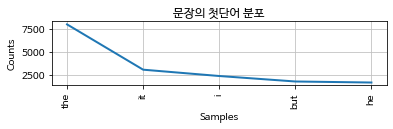

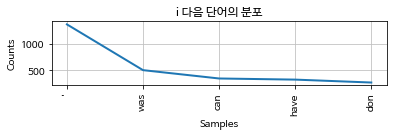

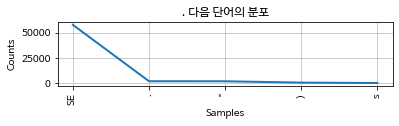

In [ ]:
import matplotlib.pyplot as plt


plt.rc('font', family='NanumBarunGothic') 
plt.subplot(311)
cfd["SS"].plot(5, title="문장의 첫단어 분포")
plt.subplot(312)
cfd["i"].plot(5, title="i 다음 단어의 분포")
plt.subplot(313)
cfd["."].plot(5, title=". 다음 단어의 분포")

빈도를 추정하면 각각의 조건부 확률은 기본적으로 다음과 같이 추정을 할 수 있다.

$~~~~~~~~~~~~~~P(w {\mid} w_c){\dfrac {C(w_c,w)}{C(w_c)}}$

위 식에서 $C(w_c,w)$은 말뭉치에서 $(w_c,w)라는 바이그램이 나타내는 횟수 $C(w_c)$은 전체 말뭉치에서 $(W_c)$ 라는 유니그램(단어)이 나타는 횟수

In [ ]:
from nltk.probability import ConditionalProbDist, MLEProbDist
cpd = ConditionalProbDist(cfd, MLEProbDist)

In [ ]:
cpd["i"].prob("am") # 트레이닝이 끝나면 조건부 확률의 값을 보거나 샘플 문장을 입력해서 문장의 로그 확률을 구할 수 있다.

0.018562267971650354

In [ ]:
cpd["i"].prob("'")

0.1526605917426032

In [ ]:
cpd["i"].prob("is")

0.0002249971875351558

In [ ]:
cpd["i"].prob("are")

0.0001124985937675779

In [ ]:
cpd["we"].prob("are")

0.08504504504504505

In [ ]:
cpd["we"].prob("is")

0.0

# 바이그램 언어 모형

조건부 확률을 알게 되면 각 문장의 확률을 구할 수 있다.

바이그램 모형에서는 전체 문장의 확률은 다음과 같이 조건부 확률을 곱으로 나타냄.

$~~~~~~~~~~~~~~~P(SS I am a boy SE) = P(I {\mid} SS) 	\cdot P(am {\mid} I) 	\cdot P(a {\mid} am) 	\cdot P(boy {\mid} a) 	\cdot P(am {\mid} I) \cdot P(. {\mid} boy )\cdot P(SE {\mid} .)$

In [ ]:
#문장(단어 리스트)의 리스트를 만듬
def sentence_score(s):
    p = 0.0
    for i in range(len(s) - 1):
        c = s[i]
        w = s[i + 1]
        p += np.log(cpd[c].prob(w) + np.finfo(float).eps)
    return np.exp(p)

In [ ]:
test_sentence = ["i", "like", "the", "movie", "."]
sentence_score(test_sentence)

2.740764134071561e-06

In [ ]:
test_sentence = ["like", "i", "the", ".", "movie"]
sentence_score(test_sentence)

2.0530004609775863e-27

In [ ]:
#랜덤하게 문장 생성

def generate_sentence(seed=None):
    if seed is not None:
        import random
        random.seed(seed)
    c = "SS"
    sentence = []
    while True:
        if c not in cpd:
            break
        w = cpd[c].generate()

        if w == "SE":
            break
        elif w in ["i", "ii", "iii"]:
            w2 = w.upper()
        elif w in ["mr", "luc", "i", "robin", "williams", "cindy", "crawford"]:
            w2 = w.title()
        else:
            w2 = w

        if c == "SS":
            sentence.append(w2.title())
        elif c in ["`", "\"", "'", "("]:
            sentence.append(w2)
        elif w in ["'", ".", ",", ")", ":", ";", "?"]:
            sentence.append(w2)
        else:
            sentence.append(" " + w2)

        c = w
    return "".join(sentence)

In [ ]:
generate_sentence(6)

'Susan egan (or even remotely comprehendible.'

한글 자료를 이용하여서 Naver Sentiment Moive corpus를 사용해보자.

In [ ]:
%%time
!wget -nc -q https://raw.githubusercontent.com/e9t/nsmc/master/ratings_train.txt

CPU times: user 4.42 ms, sys: 9.25 ms, total: 13.7 ms
Wall time: 220 ms


In [ ]:
#-*-coding : utf-8 -*-
import codecs
# UTF-8 : '유니코드를 위한 가변 길이(들어오기 전에 비워놓는 길이.) 문자 인코딩 방식 중 하나.
#codecs : UTF-8+ 한글처리에 용이.
#codecs : 반드시 문자열은 유니코드로 처리 ->어떤 문자열 셋으로 변환된 문자들로 codecs를 통해 열게 된 파일에 쓰는게 안됨.
with codecs.open("ratings_train.txt", encoding='utf-8') as f:

    # print([line for line in f.read().splitlines()])
    data = [line.split('\t') for line in f.read().splitlines()] #line.split('\t') :tab키로 분할해주세요.
    #f.read().splitlines() :읽었는데, line별로 split로 해준것을 변수로 받아들음.
    data = data[1:]   # header 제외
    # print(data[1:5])

docs = [row[1] for row in data]
len(docs)

150000

In [ ]:
!pip install konlpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 19.4 MB 1.2 MB/s 
     |████████████████████████████████| 453 kB 66.7 MB/s 


In [ ]:
import warnings
warnings.simplefilter("ignore")
#에러는 아닌데, warning을 무시하겟습니다.

from konlpy.tag import Okt

tagger = Okt()

def tokenize(doc):
  # tokens = []
  # for t in tagger.pos(doc):
  #   print(type(t))
  #   tokens.append('/'.join(t))
    tokens = ['/'.join(t) for t in tagger.pos(doc)] #Okt의 품사태킹
    return tokens

tokenize("그 영화는 아주 재미있었어요.")

['그/Noun', '영화/Noun', '는/Josa', '아주/Noun', '재미있었어요/Adjective', './Punctuation']

In [ ]:
from tqdm import tqdm
sentences = []
for d in tqdm(docs):
    # print('d = ', d)
    tokens = tokenize(d)
    bigram = ngrams(tokens, 2, pad_left=True, pad_right=True, left_pad_symbol="SS", right_pad_symbol="SE")
    sentences += [t for t in bigram]

 17%|█▋        | 24890/150000 [01:14<06:14, 334.13it/s]


KeyboardInterrupt: ignored

In [ ]:
sentences[:30]

[('SS', '아/Exclamation'),
 ('아/Exclamation', '더빙/Noun'),
 ('더빙/Noun', '../Punctuation'),
 ('../Punctuation', '진짜/Noun'),
 ('진짜/Noun', '짜증나네요/Adjective'),
 ('짜증나네요/Adjective', '목소리/Noun'),
 ('목소리/Noun', 'SE'),
 ('SS', '흠/Noun'),
 ('흠/Noun', '.../Punctuation'),
 ('.../Punctuation', '포스터/Noun'),
 ('포스터/Noun', '보고/Noun'),
 ('보고/Noun', '초딩/Noun'),
 ('초딩/Noun', '영화/Noun'),
 ('영화/Noun', '줄/Noun'),
 ('줄/Noun', '..../Punctuation'),
 ('..../Punctuation', '오버/Noun'),
 ('오버/Noun', '연기/Noun'),
 ('연기/Noun', '조차/Josa'),
 ('조차/Josa', '가볍지/Adjective'),
 ('가볍지/Adjective', '않구나/Verb'),
 ('않구나/Verb', 'SE'),
 ('SS', '너/Modifier'),
 ('너/Modifier', '무재/Noun'),
 ('무재/Noun', '밓었/Noun'),
 ('밓었/Noun', '다그/Noun'),
 ('다그/Noun', '래서/Noun'),
 ('래서/Noun', '보는것을/Verb'),
 ('보는것을/Verb', '추천/Noun'),
 ('추천/Noun', '한/Josa'),
 ('한/Josa', '다/Adverb')]

In [ ]:
cfd = ConditionalFreqDist(sentences)
cpd = ConditionalProbDist(cfd, MLEProbDist)

def korean_most_common(c, n, pos=None):
    if pos is None:
        return cfd[tokenize(c)[0]].most_common(n)
    else:
        return cfd["/".join([c, pos])].most_common(n)

In [ ]:
korean_most_common("나", 10)

[('는/Josa', 831),
 ('의/Josa', 339),
 ('만/Josa', 213),
 ('에게/Josa', 148),
 ('에겐/Josa', 84),
 ('랑/Josa', 81),
 ('한테/Josa', 50),
 ('참/Verb', 45),
 ('이/Determiner', 44),
 ('와도/Josa', 43)]

In [ ]:
korean_most_common("의", 10)

[('영화/Noun', 19),
 ('연기/Noun', 14),
 ('구심/Noun', 12),
 ('모습/Noun', 9),
 ('감독/Noun', 8),
 ('매력/Noun', 7),
 ('감동/Noun', 7),
 ('흐름/Noun', 6),
 ('그/Noun', 6),
 ('이야기/Noun', 6)]

In [ ]:
korean_most_common(".", 10, "Punctuation")

[('SE', 26503),
 ('영화/Noun', 667),
 ('이/Noun', 565),
 ('정말/Noun', 480),
 ('그리고/Conjunction', 455),
 ('./Punctuation', 445),
 ('하지만/Conjunction', 369),
 ('이/Determiner', 352),
 ('그/Noun', 325),
 ('스토리/Noun', 317)]

In [ ]:
def korean_bigram_prob(c, w):
    context = tokenize(c)[0]
    word = tokenize(w)[0]
    return cpd[context].prob(word)

In [ ]:
korean_bigram_prob("이", "영화")

0.4010748656417948

In [ ]:
korean_bigram_prob("영화", "이")

0.00015767585785521414

In [ ]:
def korean_generate_sentence(seed=None, debug=False):
    if seed is not None:
        import random
        random.seed(seed)
    c = "SS"
    sentence = []
    while True:
        if c not in cpd:
            break
            
        w = cpd[c].generate()

        if w == "SE":
            break

        w2 = w.split("/")[0]
        pos = w.split("/")[1]

        if c == "SS":
            sentence.append(w2.title())
        elif c in ["`", "\"", "'", "("]:
            sentence.append(w2)
        elif w2 in ["'", ".", ",", ")", ":", ";", "?"]:
            sentence.append(w2)
        elif pos in ["Josa", "Punctuation", "Suffix"]:
            sentence.append(w2)
        elif w in ["임/Noun", "것/Noun", "는걸/Noun", "릴때/Noun",
                   "되다/Verb", "이다/Verb", "하다/Verb", "이다/Adjective"]:
            sentence.append(w2)
        else:
            sentence.append(" " + w2)
        c = w

        if debug:
            print(w)

    return "".join(sentence)

In [ ]:
korean_generate_sentence(0)

'미키짱과 말도 전혀 빗나가지 않던 전개로 꽥꽥대는거 보니까 요^^'

In [ ]:
korean_generate_sentence(1)

'내용 일테인데 이 영화 최고의 암살 할려고 한 데 선배랑 김선아 연기도 크다. 배슬기 여배우도 있는 척 하는거지?'

In [ ]:
korean_generate_sentence(2)

'도리까지 본 영화 너무... 뭔가.. 최고네요. 하지만.. 눈물 낫다는건 또 영화에 들지 않는다. 근데 뭐야 어떻게 그렇게 착했던 윤재랑은 에바 그린 드레스 소리 듣는거임""" 에리 욧의 미모로 합성 한 가수 노래와 흥행 놓친 영화다. 사투리 연기 하나 없는 ‘ 스피드 감 넘치는 스릴 넘치는 연기를 이해 되지 못 하시는 분보다 훨 재밌구만 평점을 망처 놓은 듯하다. 영화 보는이로 하여금 불편함을 느꼇을듯'

In [ ]:
korean_generate_sentence(3)

'내 인생을 반헬싱이 너무 무섭고 재밌고, 칼 세이건으로 연탄가스 맡아서 죽을 같이 작업 하는구나 ㅋㅋㅋㅋㅋ 진짜'

In [ ]:
korean_generate_sentence(5)

'좋았어요... ㅎㄷㄷㄷ 시나리오나 그래픽이 대단한 심리전이 미라 파스틱 함.. 너무 무섭고 나쁜세 끼는 듯 진짜 꼭 필요가 있는지도 모르겠지만 나름 그의 복수 후!!!!!!!!!!!'

확률론적 언어 모형의 활용¶
확률론적 언어 모형은 다음과 같은 분야에 광범위하게 활용할 수 있다.

- 철자 및 문법 교정(Spell Correction)

- 음성 인식(Speech Recognition)

- 자동 번역(Machine Translation)

- 자동 요약(Summarization)

- 챗봇(Question-Answering)



### N-gram Language Model의 한계
1. 희소 문제(sparsity problem)
2. n을 선택하는 것은 trade-off 문제
-  trade-off 문제로 인해 정확도를 높이려면 n은 최대 5를 넘게 잡아서는 안 된다고 권장되고 있습니다.


### 적용 분야(domain)에 맞는 코퍼스의 수집

### 인공 신경망을 이용한 언어 모델(Neural Network Based Language Model)


# 언어 모델 평가

## Perplexity

- 두 개의 모델 A, B가 있을 때 이 모델의 성능은 어떻게 비교할 수 있을까요? 두 개의 모델을 오타 교정, 기계 번역 등의 평가에 투입해볼 수 있겠습니다. 그리고 두 모델이 해당 업무의 성능을 누가 더 잘했는지를 비교하면 되겠습니다.

- 이러한 평가를 외부 평가(extrinsic evaluation)라고 하는데, 이러한 평가보다는 어쩌면 조금은 부정확할 수는 있어도 테스트 데이터에 대해서 빠르게 식으로 계산되는 더 간단한 평가 방법이 있습니다. 바로 모델 내에서 자신의 성능을 수치화하여 결과를 내놓는 내부 평가(Intrinsic evaluation)에 해당되는 펄플렉서티(perplexity)입니다.

- 펄플렉서티(perplexity)는 언어 모델을 평가하기 위한 내부 평가 지표입니다. 보통 줄여서 PPL이 라고 표현합니다

- 영어에서 'perplexed'는 '헷갈리는'과 유사한 의미를 가집니다. 그러니까 여기서 PPL은 '헷갈리는 정도'로 이해합시다. PPL를 처음 배울때 다소 낯설게 느껴질 수 있는 점이 있다면, PPL은 수치가 높으면 좋은 성능을 의미하는 것이 아니라, '낮을수록' 언어 모델의 성능이 좋다는 것을 의미한다는 점입니다.

- PPL은 단어의 수로 정규화(normalization) 된 테스트 데이터에 대한 확률의 역수입니다. PPL을 최소화한다는 것은 문장의 확률을 최대화하는 것과 같습니다. 문장 $W$의 길이가 $N$이라고 하였을 때의 PPL은 다음과 같습니다.

$~~~~~~~~~~~~~~~PPL(W) = P(w_1,w_2,w_3,\cdots,w_N)^{-{\dfrac{1}{N}}} =  \sqrt[\leftroot{-2}\uproot{2}N]{{\dfrac{1}{P(w_1,w_2,w_3,\cdots,w_N)}}}$


문장의 확률에 체인룰(Chain rule)을 적용하면 아래와 같다.
$~~~~~~~~~~~~~~~\sqrt[\leftroot{-2}\uproot{2}N]{{\dfrac{1}{P(w_1,w_2,w_3,\cdots,w_N)}}} = \sqrt[\leftroot{-2}\uproot{2}N]{{\dfrac{1}{\Pi_{i=1}^N P(w_1,w_2,w_3,\cdots,w_N)}}}$


N-gram을 적용하면, ex.bigram

$~~~~~~~~~~~~~~~PPL(W) =  \sqrt[\leftroot{-2}\uproot{2}N]{{\dfrac{1}{\Pi_{i=1}^N P(w_i {\mid} {w_{i-1}})}}}$

## 분기 계수(Braching Factor)

PPL은 선택할 수 있는 가능한 경우의 수를 의미하는 분기계수(branching factor)이다. PPL은 이 언어 모델이 특정 시점에서 평균적으로 몇 개의 선택지를 가지고 고민하고 있는지를 의미한다. 어떤 테스트 데이터을 주고 측정했더니 PPL이 10이 나왔다고 해보자.

$~~~~~~~~~~~~~~~PPW(W) = P(w_1,w_2,w_3\cdots,w_N)^{-\dfrac{1}{N}} = ({{\dfrac{1}{10}}}^N)^{-\dfrac{1}{N}} = 10$

**같은 테스트 데이터에 대해서** 두 언어 모델의 PPL을 각각 계산 후에 PPL의 값을 비교하면, 두 언어 모델 중 어떤 것이 성능이 좋은지도 판단이 가능합니다.

주의할 점은 **PPL의 값이 낮다는 것은 테스트 데이터 상에서 높은 정확도를 보인다는 것**이지, 사람이 직접 느끼기에 좋은 언어 모델이라는 것을 반드시 의미하진 않는다는 점이다. 또한 언어 모델의 PPL은 테스트 데이터에 의존하므로 두 개 이상의 언어 모델을 비교할 때는 정량적으로 양이 많고, 또한 도메인에 알맞은 동일한 테스트 데이터를 사용해야 신뢰도가 높다는 것이다.


# 다양한 단어의 표현 방법
## 단어의 표현 방법

크게 국소 표현(Local Representation) 방법(또는 이산 표현)과 분산 표현(Distributed Representation) 방법(또는 연속 표현)으로 나뉜다.

1. 국소 표현(Local Representation) 또는 이산 표현(Discrete Representation)
 - 특징 : 해당 단어 그 자체만 보고, 특정값을 매핑하여 단어를 표현하는 방법
ex) 강아지, 고양이, 친칠라 라는 단어가 있을 때 각 단어에 1번, 2번, 3번 등과 같은 숫자를 맵핑(mapping)하여 부여한다.
 - 종류 : One-Hot Vector, N-gram, count base(Bag of Words) 등
2. 분산 표현(Distributed Representation) 또는 연속 표현(Continuous Representation)
 - 특징 : 그 단어를 표현하고자 주변을 참고하여 단어를 표현하는 방법
ex) 강아지라는 단어 근처에 주로 귀여운, 사랑스러운이라는 단어가 자주 등장하므로, 강아지라는 단어는 귀엽운, 사랑스러운 느낌이다라고 단어를 정의한다.
 - 종류 : prediction base(Word2Vec, FastText), count base(LSA, Glove) 등

즉, 국소 표현 방법에서 단어의 의미, 느낌을 표현할 수 없지만, 분산 표현 방법은 단어의 느낌을 표현할 수 있다는 차이가 있다.

# 단어 표현의 카테고리화

<figure>
<img src = 'https://wikidocs.net/images/page/31767/wordrepresentation.PNG'>
<figure>



## BOW(bag of words)
- Bag of Words란 **단어들의 순서는 전혀 고려하지 않고, 단어들의 출현 빈도(frequency)에만 집중**하는 텍스트 데이터의 수치화 표현 방법입니다
- Bag of words를 직역하면 단어들의 가방.


- 갖고있는 어떤 텍스트 문서에 있는 단어들을 가방에다가 전부 넣습니다. 그러고나서 이 가방을 흔들어 단어들을 섞습니다. 만약, 해당 문서 내에서 특정 단어가 N번 등장했다면, 이 가방에는 그 특정 단어가 N개 있게됩니다. 또한 가방을 흔들어서 단어를 섞었기 때문에 더 이상 단어의 순서는 중요하지 않습니다.

- BoW를 만드는 과정을 이렇게 두 가지 과정으로 생각해보겠습니다.
 - (1) 우선, 각 단어에 고유한 정수 인덱스를 부여합니다.
 - (2) 각 인덱스의 위치에 단어 토큰의 등장 횟수를 기록한 벡터를 만듭니다.

한국어 예제를 통해서 BoW에 대해서 이해해보도록 하겠습니다.
문서1 : 정부가 발표하는 물가상승률과 소비자가 느끼는 물가상승률은 다르다.

위의 문서1에 대해서 BoW를 만들어보도록 하겠습니다. 아래의 코드는 입력된 문서에 대해서 단어 집합(vocaburary)을 만들어 인덱스를 할당하고, BoW를 만드는 코드입니다. 이 코드에 이번에 입력할 입력은 문서1입니다.

## 장점
- 쉽게 빠른 구축
- 예상보다 문서의 특징을 잘 나타내어 전통적으로 여러분야에서 활용도가 높음

## 단점
- 문맥 의미(Semantic Context) 반영 문제
- 희소 행렬 문제




In [ ]:
from konlpy.tag import Okt
import re  
okt=Okt()  

token=re.sub("(\.)","","정부가 발표하는 물가상승률과 소비자가 느끼는 물가상승률은 다르다.")  
# 정규 표현식을 통해 온점을 제거하는 정제 작업입니다.  
token=okt.morphs(token)  
# OKT 형태소 분석기를 통해 토큰화 작업을 수행한 뒤에, token에다가 넣습니다.  

word2index={} # dict
bow=[] #bag (공간을 미리 만들어놈.)  
for voca in token:  
         if voca not in word2index.keys():  #dict의 키가 없다면,
             word2index[voca]=len(word2index)  
# token을 읽으면서, word2index에 없는 (not in) 단어는 새로 추가하고, 이미 있는 단어는 넘깁니다.   
             bow.insert(len(word2index)-1,1)
# BoW 전체에 전부 기본값 1을 넣어줍니다. 단어의 개수는 최소 1개 이상이기 때문입니다.  
         else:
            index=word2index.get(voca)
# 재등장하는 단어의 인덱스를 받아옵니다.
            bow[index]=bow[index]+1
# 재등장한 단어는 해당하는 인덱스의 위치에 1을 더해줍니다. (단어의 개수를 세는 것입니다.)  
print(word2index)  

{'정부': 0, '가': 1, '발표': 2, '하는': 3, '물가상승률': 4, '과': 5, '소비자': 6, '느끼는': 7, '은': 8, '다르다': 9}


In [ ]:
bow  

[1, 2, 1, 1, 2, 1, 1, 1, 1, 1]

In [ ]:
!pip install konlpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Colab에서 Mecab설치
!pip install konlpy # 한국어 형태소 분석기 패키지 설치
!git clone https://github.com/SOMJANG/Mecab-ko-for-Google-Colab.git # 해당 git에서 Google-Colab git clone하기
%cd Mecab-ko-for-Google-Colab/
!bash install_mecab-ko_on_colab190912.sh
%cd ../

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Cloning into 'Mecab-ko-for-Google-Colab'...
remote: Enumerating objects: 115, done.
remote: Counting objects: 100% (24/24), done.
remote: Compressing objects: 100% (20/20), done.
remote: Total 115 (delta 11), reused 10 (delta 3), pack-reused 91
Receiving objects: 100% (115/115), 1.27 MiB | 11.12 MiB/s, done.
Resolving deltas: 100% (50/50), done.
/content/Mecab-ko-for-Google-Colab
Installing konlpy.....
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Done
Installing mecab-0.996-ko-0.9.2.tar.gz.....
from https://bitbucket.org/eunjeon/mecab-ko/downloads/mecab-0.996-ko-0.9.2.tar.gz
--2022-09-07 06:59:21--  https://bitbucket.org/eunjeon/mecab-ko/downloads/mecab-0.996-ko-0.9.2.tar.gz
Resolving bitbucket.org (bitbucket.org)... 104.192.141.1, 2406:da00:ff00::22cd:e0db, 2406:da00:ff00::22c0:3470, ...
Connecting to bitbucket.org (bitbucket.org)|104

In [ ]:
from konlpy.tag import Okt
from konlpy.tag import Mecab
okt=Mecab()

token="내꺼인듯 내꺼아닌 내꺼같은 너란 사람은 참"
token=okt.morphs(token) # 형태소분석
word2index={}  # 단어에 인덱스 부여
bow=[]    # 빈도수저장


# 토큰하나씩 들고온다
for voca in token:
    # word2index 안에 해당 토큰이 없다면
    if voca not in word2index:  
        # 인덱스(word2index길이만큼)를 지정해주고
        word2index[voca]=len(word2index)
        # 단어가 등장했으니, 빈도수를 담는 리스트에 1을 넣어준다.
        bow.insert(len(word2index)-1,1)
    # word2index 안에 있는 토큰이라면
    else:
        # 해당 토큰의 인덱스를 가져와서
        index=word2index[voca]
        # 한 번 더나왔으니 그 토큰의 인덱스로 빈도수 리스트에 접근하여 값을 1을 더해준다
        bow[index]=bow[index]+1

Exception: ignored

In [ ]:
print(word2index)

{'내꺼': 0, '인듯': 1, '아닌': 2, '같은': 3}


In [ ]:
print(bow)

[3, 1, 1, 1]


내꺼라는 단어가 두번 나와서 2라고 적혔고, 나머지는 1번 나와서 위와 같은 결과가 나왔다.

즉, 각 token(중복없이)에 인덱스를 부여하고, 해당 token의 빈도수를 기록한 것을 bag에 담아놓는다. 이렇게 bow화된 bag을 이용하여 이후에 어떤 문장이 주어지면, 그 문장을 token화 한 뒤, bag에서 해당 token의 빈도수를 가져와 위 예시의 bow와 같이 단어를 정수화 된 리스트로 만들 수 있다

# CountVectorizer 클래스로 BOW 만들기
- 사이킷 런에서는 단어의 빈도를 Count하여 Vector로 만드는 CountVectorizer 클래스를 지원합니다. 이를 이용하면 영어에 대해서는 손쉽게 BoW를 만들 수 있습니다.

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
corpus = ['you know I want your love. because I love you.']
vector = CountVectorizer()
print(vector.fit_transform(corpus).toarray()) # 코퍼스로부터 각 단어의 빈도 수를 기록한다.
print(vector.vocabulary_) # 각 단어의 인덱스가 어떻게 부여되었는지를 보여준다.

[[1 1 2 1 2 1]]
{'you': 4, 'know': 1, 'want': 3, 'your': 5, 'love': 2, 'because': 0}


- 예제 문장에서 you와 love는 두 번씩 언급되었으므로 각각 인덱스 2와 인덱스 4에서 2의 값을 가지며, 그 외의 값에서는 1의 값을 가지는 것을 볼 수 있습니다. 또한 알파벳 I는 BoW를 만드는 과정에서 사라졌는데, 이는 CountVectorizer가 기본적으로 길이가 2이상인 문자에 대해서만 토큰으로 인식하기 때문입니다. 정제(Cleaning) 챕터에서 언급했듯이, 영어에서는 길이가 짧은 문자를 제거하는 것 또한 전처리 작업으로 고려되기도 합니다.

- 주의할 것은 CountVectorizer는 단지 띄어쓰기만을 기준으로 단어를 자르는 낮은 수준의 토큰화를 진행하고 BoW를 만든다는 점입니다. 이는 영어의 경우 띄어쓰기만으로 토큰화가 수행되기 때문에 문제가 없지만 한국어에 CountVectorizer를 적용하면, 조사 등의 이유로 제대로 BoW가 만들어지지 않음을 의미합니다.


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
corpus = ['내꺼인듯 내꺼아닌 내꺼같은 너란 사람은 참','아니 왜 한 글 자 는 없 어 지 는 거 지']
vector = CountVectorizer()

print(vector.fit_transform(corpus).toarray()) # 코퍼스로부터 각 단어의 빈도 수를 기록한다.
print(vector.vocabulary_) # 각 단어의 인덱스가 어떻게 부여되었는지를 보여준다. 

[[1 1 1 1 1 0]
 [0 0 0 0 0 1]]
{'내꺼인듯': 2, '내꺼아닌': 1, '내꺼같은': 0, '너란': 3, '사람은': 4, '아니': 5}


하지만 결과에서 보면 내부 로직에 의해 한글자 이하는 포함시키지 않고, 띄어쓰기로 구분하여 하기 때문에 토큰화하기 때문에, 띄어쓰기를 구분자로 한 토큰화된 결과를 인풋으로 넣거나(ex. 내꺼인듯 내꺼 아닌 내꺼 같은 너란 ...), 한국어에 특화된 다른 라이브러리를 이용하면 좋을 것 같다.


# 불용어를 제거한 Bow 만들기

- BoW를 사용한다는 것은 그 문서에서 각 단어가 얼마나 자주 등장했는지를 보겠다는 것입니다.

1. 사용자가 직접 정의한 불용어 사용

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

text=["Family is not an important thing. It's everything."]
vect = CountVectorizer(stop_words=["the", "a", "an", "is", "not"])
print(vect.fit_transform(text).toarray()) 
print(vect.vocabulary_)

[[1 1 1 1 1]]
{'family': 1, 'important': 2, 'thing': 4, 'it': 3, 'everything': 0}


2. CountVectorizer에서 제공하는 자체 불용어 사용

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

text=["Family is not an important thing. It's everything."]
vect = CountVectorizer(stop_words="english")
print(vect.fit_transform(text).toarray())
print(vect.vocabulary_)

[[1 1 1]]
{'family': 0, 'important': 1, 'thing': 2}


3. NLTK에서 지원하는 불용어 사용

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords

import nltk
nltk.download('stopwords')

text=["Family is not an important thing. It's everything."]
sw = stopwords.words("english")
vect = CountVectorizer(stop_words =sw)
print(vect.fit_transform(text).toarray()) 
print(vect.vocabulary_)

[[1 1 1 1]]
{'family': 1, 'important': 2, 'thing': 3, 'everything': 0}


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
